In [1]:
from lcapy import Circuit, j, omega, s
cct = Circuit("""
Vi 1 0_1 step; down
C 1 2; right, size=1.5
R 2 0; down
W 0_1 0; right
W 0 0_2; right, size=0.5
P1 2_2 0_2; down
W 2 2_2;right, size=0.5""")


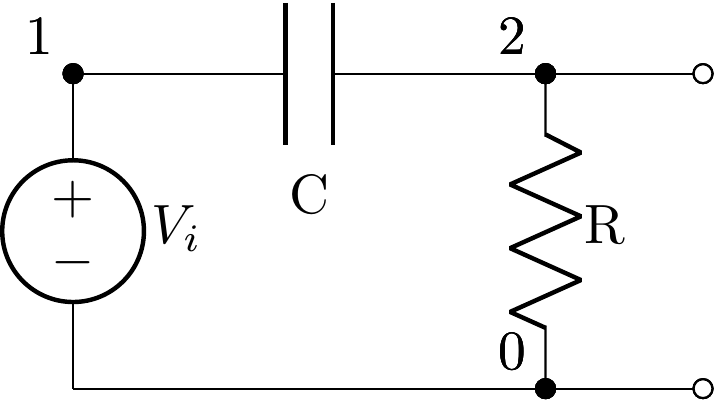

In [2]:
cct.draw()

In [3]:
H = (cct.R.V(s) / cct.Vi.V(s)).simplify(); H

  C⋅R⋅s  
─────────
C⋅R⋅s + 1

In [4]:
H(j * omega)

  ⅉ⋅C⋅R⋅ω  
───────────
ⅉ⋅C⋅R⋅ω + 1

In [5]:
H(j * omega).rationalize_denominator()

 2  2  2          
C ⋅R ⋅ω  + ⅉ⋅C⋅R⋅ω
──────────────────
    2  2  2       
   C ⋅R ⋅ω  + 1   

In [6]:
H(j * omega).real_imag

   2  2  2                 
  C ⋅R ⋅ω        ⅉ⋅C⋅R⋅ω   
──────────── + ────────────
 2  2  2        2  2  2    
C ⋅R ⋅ω  + 1   C ⋅R ⋅ω  + 1

In [7]:
H(j * omega).magnitude


   _____________________
  ╱  4  4  4    2  2  2 
╲╱  C ⋅R ⋅ω  + C ⋅R ⋅ω  
────────────────────────
       2  2  2          
      C ⋅R ⋅ω  + 1      

In [8]:
H(j * omega).phase_degrees

180⋅atan2(1, C⋅R⋅ω)
───────────────────
         π         

In [9]:
H1 = H.subs('C', 1e-6).subs('R', 1e3)
H1(j * omega)

      ⅉ⋅ω      
───────────────
     ⎛ⅉ⋅ω     ⎞
1000⋅⎜──── + 1⎟
     ⎝1000    ⎠

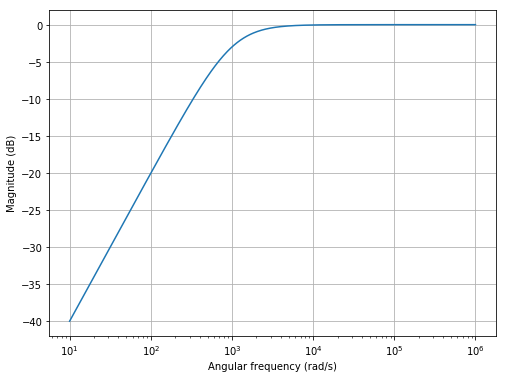

In [10]:
from numpy import logspace
w = logspace(1, 6, 500)
%matplotlib inline
ax = H1(j * omega).dB.plot(w, log_frequency=True)

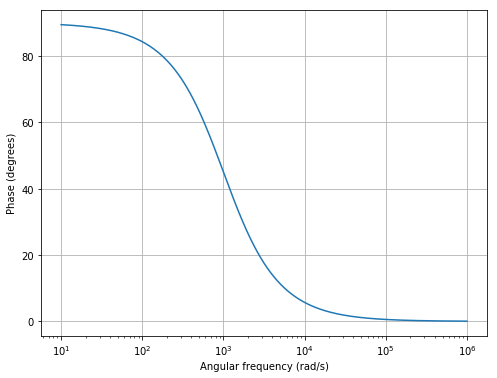

In [11]:
ax = H1(j * omega).phase_degrees.plot(w, log_frequency=True)

In [12]:
H1

       s       
───────────────
     ⎛ s      ⎞
1000⋅⎜──── + 1⎟
     ⎝1000    ⎠